<a href="https://colab.research.google.com/github/7201krap/PYTHON_applied_data_science/blob/main/apr17.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
from sklearn import datasets

# How are we going to use evaluate the performance? 
# 1. accuracy
from sklearn import metrics
# 2. f1 score 
from sklearn.metrics import f1_score

# Machine learning models 

# Linear Regression 
# url : https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
from sklearn.linear_model import LinearRegression

# SVM
# url: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
from sklearn import svm

# KNN 
# url: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
from sklearn.neighbors import KNeighborsClassifier

# Decision Tree
# url: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
from sklearn.tree import DecisionTreeClassifier

# Random Forest 
# url: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
from sklearn.ensemble import RandomForestClassifier

# Logistic Classifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import learning_curve, RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import train_test_split, KFold
from sklearn.datasets import make_classification
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

import numpy as np
import matplotlib.pyplot as plt

# PCA 
from sklearn.decomposition import PCA 

# Linear Regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns

Here, I use cancer dataset for tutorials.
It can be simply changed to another dataset

## Machine learning algorithms that we are going to use

- SVM

- Random Forest 

- Decision Tree 

- Softmax 

- KNN 

## Preprocess all data
https://www.datacamp.com/community/tutorials/svm-classification-scikit-learn-python

In [34]:
sampled_dep_thoughts = pd.read_csv('sampled_dep_thoughts.csv')

target = sampled_dep_thoughts['dep_thoughts'].copy()

data = sampled_dep_thoughts.copy()
del data['dep_thoughts']

In [35]:
data

,comp_week,comp_wend,text_week,text_wend,tv_week,tv_wend
0,1,1,1,1,1,1
1,1,1,2,3,2,2
2,1,1,1,1,2,1
3,2,2,1,1,2,2
4,2,2,1,1,3,3
...,...,...,...,...,...,...
914,3,2,2,2,0,0
915,3,3,1,1,2,2
916,1,1,2,2,1,2
917,1,1,2,2,2,2


In [36]:
target

0      2.0
1      2.0
2      2.0
3      2.0
4      2.0
      ... 
914    5.0
915    1.0
916    0.0
917    1.0
918    1.0
Name: dep_thoughts, Length: 919, dtype: float64

## PCA section

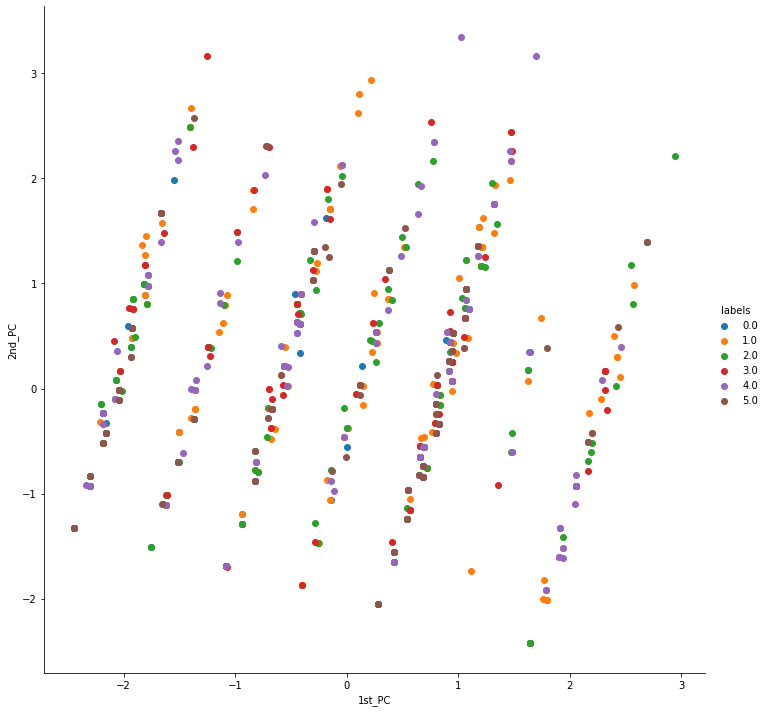

In [37]:
pca = PCA(n_components=2, random_state=1)
pca_data = pca.fit_transform(data)

data_with_labels = np.vstack((pca_data.T, target)).T
pca_df = pd.DataFrame(data=data_with_labels, columns=('1st_PC', '2nd_PC', 'labels'))
sns.FacetGrid(pca_df, hue='labels', height=10).map(plt.scatter, '1st_PC', '2nd_PC').add_legend()
plt.show()

In [38]:
pca_df

,1st_PC,2nd_PC,labels
0,1.325860,1.760679,2.0
1,-0.983338,1.491239,2.0
2,1.180547,1.359116,2.0
3,0.804806,-0.147614,2.0
4,0.547626,-0.962630,2.0
...,...,...,...
914,-0.189807,1.345084,5.0
915,0.540933,-1.240892,1.0
916,-0.150706,1.710230,0.0
917,-0.296019,1.308666,1.0


## Generate Train and Test - Linear Regression

In [39]:
from sklearn.model_selection import train_test_split

X_pca_train, X_pca_test, y_pca_train, y_pca_test = train_test_split(pca_data, target, test_size=0.3, random_state=1)  # 70% training and 30% test

## Generate Train and Test - Others

In [40]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.3, random_state=1)  # 70% training and 30% test

## Linear Regression

In [41]:
lin_reg = LinearRegression()
lin_reg.fit(X_pca_train, y_pca_train)

y_pca_pred = lin_reg.predict(X_pca_test)

mse = mean_squared_error(y_pca_test, y_pca_pred)
rmse = np.sqrt(mse)
r2_point = r2_score(y_pca_test, y_pca_pred)


print("RMSE value: ", rmse)
print("R2 value: ", r2_point)

RMSE value:  1.3752304215205509
R2 value:  -0.01152536854883901


## SVM

In [42]:
folds = KFold(n_splits = 5, shuffle = True, random_state = 1)

In [43]:
svm_hyper_params = [ 
                        {
                        'gamma': np.logspace(-4, -1, 4),
                        'C': np.logspace(-3, 1, 5),
                        'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
                        }
                    ]

# specify model
svm_model = svm.SVC(random_state=1)

# set up GridSearchCV()
svm_model_cv = GridSearchCV(estimator = svm_model, 
                            param_grid = svm_hyper_params, 
                            scoring= 'accuracy', 
                            cv = folds, 
                            verbose = 2,
                            return_train_score=True,
                            n_jobs=2)      

In [44]:
# fit the model
svm_model_cv.fit(X_train, y_train)
print("best hyper parameters", svm_model_cv.best_params_)
svm_y_pred = svm_model_cv.predict(X_test)

Fitting 5 folds for each of 80 candidates, totalling 400 fits
best hyper parameters {'C': 0.001, 'gamma': 0.0001, 'kernel': 'linear'}


In [45]:
# accuracy 
print("Accuracy:", metrics.accuracy_score(y_test, svm_y_pred))
# f1 score 
print("F1 score macro:", f1_score(y_test, svm_y_pred, average='macro'))
print("F1 score weighted:", f1_score(y_test, svm_y_pred, average='weighted'))

Accuracy: 0.3188405797101449
F1 score macro: 0.08058608058608058
F1 score weighted: 0.15416467590380634


## Logistic Regression

In [46]:
log_hyper_params = [ 
                        {
                        'C': np.logspace(-4, 2, 7),
                        'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
                        'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
                        'multi_class' : ['auto', 'ovr', 'multinomial']
                        }
                    ]

# specify model
log_model = LogisticRegression(random_state=1)

# set up GridSearchCV()
log_model_cv = GridSearchCV(estimator = log_model, 
                            param_grid = log_hyper_params, 
                            scoring= 'accuracy', 
                            cv = folds, 
                            verbose = 2,
                            return_train_score=True,
                            n_jobs=-1)      

In [47]:
# fit the model
log_model_cv.fit(X_train, y_train)
print("best hyper parameters", log_model_cv.best_params_)
log_y_pred = log_model_cv.predict(X_test)

Fitting 5 folds for each of 420 candidates, totalling 2100 fits
best hyper parameters {'C': 0.01, 'multi_class': 'auto', 'penalty': 'l1', 'solver': 'liblinear'}


/home/jhpark/.local/lib/python3.8/site-packages/sklearn/model_selection/_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan        nan 0.06843508        nan 0.32962694 0.32962694
 0.32962694 0.32962694 0.32962694 0.32962694        nan        nan
        nan        nan        nan 0.32189922 0.32189922        nan
 0.32189922 0.32189922        nan        nan 0.06843508        nan
 0.32962694 0.32962694 0.32962694 0.32962694 0.32962694 0.32962694
        nan        nan        nan        nan        nan 0.32034884
 0.32034884        nan 0.32034884 0.32034884        nan        nan
        nan        nan 0.32962694 0.32962694 0.32962694        nan
 0.32962694 0.32962694        nan        nan        nan        nan
        nan 0.32189922 0.32189922        nan 0.32189922 0.32189922
        nan        nan 0.06843508        nan 0.32962694 0.32962694
 0.32962694 0.32962694 0.32962694 0.32962694        nan        nan
        nan        nan        nan 0.32189922 0.3

In [48]:
# accuracy 
print("Accuracy:", metrics.accuracy_score(y_test, log_y_pred))
# f1 score 
print("F1 score macro:", f1_score(y_test, log_y_pred, average='macro'))
print("F1 score weighted:", f1_score(y_test, log_y_pred, average='weighted'))

Accuracy: 0.3079710144927536
F1 score macro: 0.07914338919925513
F1 score weighted: 0.15140474455509675


## KNN

In [49]:
knn_hyper_params = [ 
                        {
                        'weights' : ['uniform', 'distance'],
                        'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
                        'leaf_size' : np.linspace(2, 100, 10, dtype=int)
                        }
                    ]

# specify model

# THIS SECTION SHOULD BE CHANGED.
# n_neighbors  SHOULD BE MODIFIED TO ANOTHER VALUE DEPENDING ON THE TARGET VALUE.
knn_model = KNeighborsClassifier(n_neighbors=len(target.unique()))

# set up GridSearchCV()
knn_model_cv = GridSearchCV(estimator = knn_model, 
                            param_grid = knn_hyper_params, 
                            scoring= 'accuracy', 
                            cv = folds, 
                            verbose = 2,
                            return_train_score=True,
                            n_jobs=-1)      

In [50]:
# fit the model
knn_model_cv.fit(X_train, y_train)
print("best hyper parameters", knn_model_cv.best_params_)
knn_y_pred = knn_model_cv.predict(X_test)

Fitting 5 folds for each of 80 candidates, totalling 400 fits
best hyper parameters {'algorithm': 'ball_tree', 'leaf_size': 67, 'weights': 'uniform'}


In [51]:
# accuracy 
print("Accuracy:", metrics.accuracy_score(y_test, knn_y_pred))
# f1 score 
print("F1 score macro:", f1_score(y_test, knn_y_pred, average='macro'))
print("F1 score weighted:", f1_score(y_test, knn_y_pred, average='weighted'))

Accuracy: 0.2391304347826087
F1 score macro: 0.12507121410904812
F1 score weighted: 0.19797359785185567


## Random Forest

In [52]:
rf_hyper_params = [ 
                        {
                            'n_estimators' : [int(x) for x in np.linspace(5, 50, 5)],
                            'criterion' : ['gini', 'entropy'],
                            'max_depth' : [int(x) for x in np.linspace(2, 50, 5)],
                            'min_samples_split' : [int(x) for x in np.linspace(2, 50, 5)],
                            'min_samples_leaf' : [int(x) for x in np.linspace(2, 50, 5)],
                            'max_features' : ['auto', 'sqrt', 'log2'],
                            'bootstrap' : [True, False]

                        }
                    ]

# specify model

# THIS SECTION SHOULD BE CHANGED.
# n_neighbors  SHOULD BE MODIFIED TO ANOTHER VALUE DEPENDING ON THE TARGET VALUE.
rf_model = RandomForestClassifier(random_state=1)

# set up GridSearchCV()
rf_model_cv = GridSearchCV(estimator = rf_model, 
                            param_grid = rf_hyper_params, 
                            scoring= 'accuracy', 
                            cv = folds, 
                            verbose = 2,
                            return_train_score=True,
                            n_jobs=-1)      

In [53]:
# fit the model
rf_model_cv.fit(X_train, y_train)
print("best hyper parameters", rf_model_cv.best_params_)
rf_y_pred = rf_model_cv.predict(X_test)

Fitting 5 folds for each of 7500 candidates, totalling 37500 fits


KeyboardInterrupt: 

In [ ]:
# accuracy 
print("Accuracy:", metrics.accuracy_score(y_test, rf_y_pred))
# f1 score 
print("F1 score macro:", f1_score(y_test, rf_y_pred, average='macro'))
print("F1 score weighted:", f1_score(y_test, rf_y_pred, average='weighted'))